#1. 10 Topics

Business Goal 1: \
Determine which topics are easy to cause conflict. \
Technical Proposal 1: \
Randomly extract a large amount of comments under different subreddits. Converting data or sentences into a format that the NLP model can handle well. Do sentiment analysis to these text datasets. Compare the result from different subreddits.

Business Goal 2: \
Determine which topics are more popular. \
Technical Proposal 2: \
Count the number of comments under different subreddits. Count the number of thumb up and thumb down. Count the number of users who take part in the topic. 

Business Goal 3: \
Auto classify submission based on the content. \
Technical Proposal 3: \
Extract the content from the submission dataframe. Clean the text data and cobvert them into a format that the NLP model can handle well. Split the data into training and testing datasets. Build a NLP model to the classification and train the model on the training data. Caluculate the accuracy on testing dataset. 

Business Goal 4: \
In top adult topics, how much do LGBTQ+ groups’ reddits contribute? \
Technical Proposal 4: \
Identify the top 20 adult topics. Use NLP to identify posts that mention LGBTQ+ contents. Calculate the number of posts and submissions of LGBTQ+ groups.

Business Goal 5: \
Determine whether post with media file can have more viewing count. \
Techincal Proposal 5: \
Label the data into with media and without model. Build ML models to predict the metric(viewing count or comment numbers). Optimize the model and try to find the least error by cross-validation.

Business Goal 6: \
Predict the score for the comments. \
Technical Proposal 6: \
Extract the content, score and other useful parameters from the comments. Split the data into training and testing dataset. Use training data to build a machine learning model to do the prediction.  Cet the accuracy from the test data. 

Business Goal 7: \
Predict the number of new comments in the future. \
Technical Proposal 7: \
Change the comment's create_utc into date format. Use groupby and aggregation find the number of comments in each day. Split the dataset into training and testing datasets. Build a machine learning or time series model. Train and test the model.

Business Goal 8: \
Which adult submission will attract more attention? \
Technical Proposal 8: \
Implement photo detection to adult pictures and classify them into different dummy variables. Try to find the most popular content. Build machine learning models to predict future submissions. 

Business Goal 9: \
Determine the language the reddit will count your submission as over_18. \
Technical Proposal: \
Filter all the submission labeled as over_18. Converting data or sentences into a format that the NLP model can handle well. Use NLP model to find the keywords.

Business Goal 10: \
Which topics or words will increase the depth of sub-comments and comments. \
Techincal Proposal 10: \
Divide replies into dispute replies and general replies according to a certain number of comment depths. Converting data or sentences into a format that the NLP model can handle well. Use NLP model to find the keywords.

# 2. Conduct EDA

In [0]:
import os
PLOT_DIR = os.path.join("data", "plots")
CSV_DIR = os.path.join("data", "csv")
os.makedirs(PLOT_DIR, exist_ok=True)
os.makedirs(CSV_DIR, exist_ok=True)

## Test Cell

In [0]:
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")


Out[88]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_SUCCESS', name='_SUCCESS', size=0, modificationTime=1666559692000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_committed_6430546272860639810', name='_committed_6430546272860639810', size=4681232, modificationTime=1666559692000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/_started_6430546272860639810', name='_started_6430546272860639810', size=0, modificationTime=1666559125000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/part-00000-tid-6430546272860639810-74fcef5e-1966-48e8-bd31-ca9976a93c8f-3-1-c000.snappy.parquet', name='part-00000-tid-6430546272860639810-74fcef5e-1966-48e8-bd31-ca9976a93c8f-3-1-c000.snappy.parquet', size=18145455, modificationTime=1666557337000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.ne

## Load the dataset

In [0]:
dbutils.fs.ls("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet")

Out[89]: [FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments/', name='comments/', size=0, modificationTime=1666557328000),
 FileInfo(path='abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions/', name='submissions/', size=0, modificationTime=1666559745000)]

In [0]:
comments = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/comments")
submissions = spark.read.parquet("abfss://anly502@marckvaismanblob.dfs.core.windows.net/reddit/parquet/submissions")

##2.1 Print the number of rows, Columns and the schema of the datasets

In [0]:
comments_row_count = comments.count()
comment_col_count = len(comments.columns)
print(f"shape of the comments dataframe is {comments_row_count:,}x{comment_col_count}")

shape of the comments dataframe is 4,473,556,762x21


In [0]:
comments.printSchema()

root
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- can_gild: boolean (nullable = true)
 |-- controversiality: long (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- edited: string (nullable = true)
 |-- gilded: long (nullable = true)
 |-- id: string (nullable = true)
 |-- is_submitter: boolean (nullable = true)
 |-- link_id: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- retrieved_on: long (nullable = true)
 |-- score: long (nullable = true)
 |-- stickied: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)



In [0]:
submissions_row_count = submissions.count()
submission_col_count = len(submissions.columns)
print(f"shape of the comments dataframe is {submissions_row_count:,}x{submission_col_count}")

shape of the comments dataframe is 643,255,528x68


In [0]:
submissions.printSchema()

root
 |-- adserver_click_url: string (nullable = true)
 |-- adserver_imp_pixel: string (nullable = true)
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_cakeday: boolean (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- author_id: string (nullable = true)
 |-- brand_safe: boolean (nullable = true)
 |-- contest_mode: boolean (nullable = true)
 |-- created_utc: long (nullable = true)
 |-- crosspost_parent: string (nullable = true)
 |-- crosspost_parent_list: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- approved_at_utc: string (nullable = true)
 |    |    |-- approved_by: string (nullable = true)
 |    |    |-- archived: boolean (nullable = true)
 |    |    |-- author: string (nullable = true)
 |    |    |-- author_flair_css_class: string (nullable = true)
 |    |    |-- author_flair_text: string (nullable = true)
 |    |    |-- b

In [0]:
comment_small = comments.sample(withReplacement=False, fraction=0.0000005)
submission_small = submissions.sample(withReplacement=False, fraction = 0.00001)

##2.2 Count the number of missing value for each columns

In [0]:
from pyspark.sql.functions import isnan, when, count, col

#comment_small.select([count(when(col(c).isNull(), c)).alias(c) for c in comment_small.columns]).show()
comments.select([count(when(col(c).isNull(), c)).alias(c) for c in comments.columns]).show()

+------+--------------+----------------------+-----------------+----+--------+----------------+-----------+-------------+------+------+---+------------+-------+---------+---------+------------+-----+--------+---------+------------+
|author|author_cakeday|author_flair_css_class|author_flair_text|body|can_gild|controversiality|created_utc|distinguished|edited|gilded| id|is_submitter|link_id|parent_id|permalink|retrieved_on|score|stickied|subreddit|subreddit_id|
+------+--------------+----------------------+-----------------+----+--------+----------------+-----------+-------------+------+------+---+------------+-------+---------+---------+------------+-----+--------+---------+------------+
|     0|    4458532168|            4043040362|       3608782487|   0|       0|               0|          0|   4318028560|     0|     0|  0|           0|      0|        0|        0|  1031220301|    0|       0|        0|           0|
+------+--------------+----------------------+-----------------+----+---

In [0]:
#submission_small.select([count(when(col(c).isNull(), c)).alias(c) for c in submission_small.columns]).show()
submissions.select([count(when(col(c).isNull(), c)).alias(c) for c in submissions.columns]).show()

+------------------+------------------+--------+------+--------------+----------------------+-----------------+---------+----------+------------+-----------+----------------+---------------------+----------------+-------------+-------+---------------+------+----------+---------+------+------+----------+---------+---+---------+----------------+----------------------+-------+--------+--------------------+---------------+------+---------+-----------+-------------+------------+--------------+-------------+-------+-----------------------+---------+------+---------+---------+---------+-----------+---------------------+------------+------------+-----+------------+------------------+--------+-------+--------+---------+------------+--------------+--------------------+--------------------+----------------------+---------+----------------+---------------+-----+-------+----------------+
|adserver_click_url|adserver_imp_pixel|archived|author|author_cakeday|author_flair_css_class|author_flair_text|a

#3. Charts

##3.1 The distribution of the length of the comments

In [0]:
#check the length of the comment
from pyspark.sql.functions import *
df = comment_small.withColumn("length_of_comments", length("body"))
df.select('length_of_comments').show(truncate=False)

+------------------+
|length_of_comments|
+------------------+
|154               |
|104               |
|9                 |
|359               |
|7                 |
|252               |
|745               |
|273               |
|13                |
|9                 |
|9                 |
|1167              |
|4                 |
|20                |
|52                |
|177               |
|106               |
|180               |
|236               |
|51                |
+------------------+
only showing top 20 rows



In [0]:
pip install pyspark-dist-explore


Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel('length')
ax.set_ylabel('count')
ax.set_title('Distribution of Nasdaq open number and Reddit nuew submission')
hist(ax, df.select('length_of_comments'), bins = 50, color=['red'])
plot_fpath = os.path.join(PLOT_DIR, 'Distribution.png')

fig.savefig(plot_fpath)

fig.show()

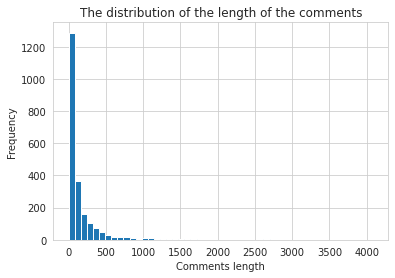

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.hist(df.toPandas().length_of_comments, bins=50)
plt.title('The distribution of the length of the comments')
plt.xlabel('Comments length')
plt.ylabel('Frequency')
plot_fpath = os.path.join(PLOT_DIR, 'distribution_of_content_length.png')

plt.savefig(plot_fpath)

plt.show() 

According to the graph, we can see that there are few of comments have length larger than 500. So, we will ignore these comments.

Filter the rows with minimum length of comments

In [0]:
#remove rows of data that might be corrupted
from pyspark.sql.functions import length
comment_small = comment_small.where(length(col("body")) <= 500)
comment_small.show()

+--------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|              author|author_cakeday|author_flair_css_class|   author_flair_text|                body|can_gild|controversiality|created_utc|distinguished|edited|gilded|     id|is_submitter|  link_id| parent_id|           permalink|retrieved_on|score|stickied|           subreddit|subreddit_id|
+--------------------+--------------+----------------------+--------------------+--------------------+--------+----------------+-----------+-------------+------+------+-------+------------+---------+----------+--------------------+------------+-----+--------+--------------------+------------+
|   JesusPretzelThief|          null|                      |           :England:|&gt;Ronaldo to sc...|    true|       

## 3.2 A Treemap of top 10 subreddits with the most number of comments

In [0]:
# create a new variable to store the number of comments for each subreddits.
num_comments = submission_small.groupBy("subreddit").sum("num_comments").orderBy(col("sum(num_comments)"), ascending=False).collect()

In [0]:
# select top 10 subreddits with the most number of comments
top_n = 10
top_n_comments_amount = spark.createDataFrame(num_comments[:top_n]).toPandas()

In [0]:
!/local_disk0/.ephemeral_nfs/envs/pythonEnv-fc0f9758-0dec-47fd-9d2d-0aeb5839e691/bin/python -m pip install --upgrade pip
!pip install squarify

/bin/bash: /local_disk0/.ephemeral_nfs/envs/pythonEnv-fc0f9758-0dec-47fd-9d2d-0aeb5839e691/bin/python: No such file or directory
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-3bc68a89-115b-48d1-ac2b-037bfdbfd278/bin/python -m pip install --upgrade pip' command.


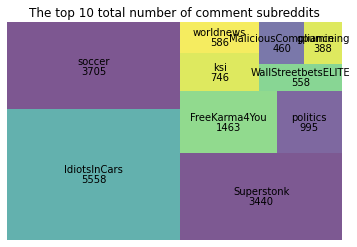

In [0]:
# plot the treemap
import matplotlib.pyplot as plt
import squarify
import pandas as pd

# plot it
squarify.plot(sizes=top_n_comments_amount['sum(num_comments)'], value=top_n_comments_amount['sum(num_comments)'], label=top_n_comments_amount['subreddit'], alpha=.7)
plt.axis('off')
plt.title('The top 10 total number of comment subreddits')

plot_fpath = os.path.join(PLOT_DIR, f'top_{top_n}_subreddits_number_comments.png')

plt.savefig(plot_fpath)

plt.show()

## 3.3 Time series plot of the total number of submissions for top 10 subreddits

In [0]:
# create a line plot to show how many submissions for each subreddits for different days
num_time = submissions.groupBy("subreddit").groupBy().count().orderBy(col("count"), ascending=False).collect()


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<command-1345013899334170> in <cell line: 2>()
      1 # create a line plot to show how many submissions for each subreddits for different days
----> 2 num_time = submissions.groupBy("subreddit").groupBy().count().orderBy(col("count"), ascending=False).collect()

AttributeError: 'GroupedData' object has no attribute 'groupBy'

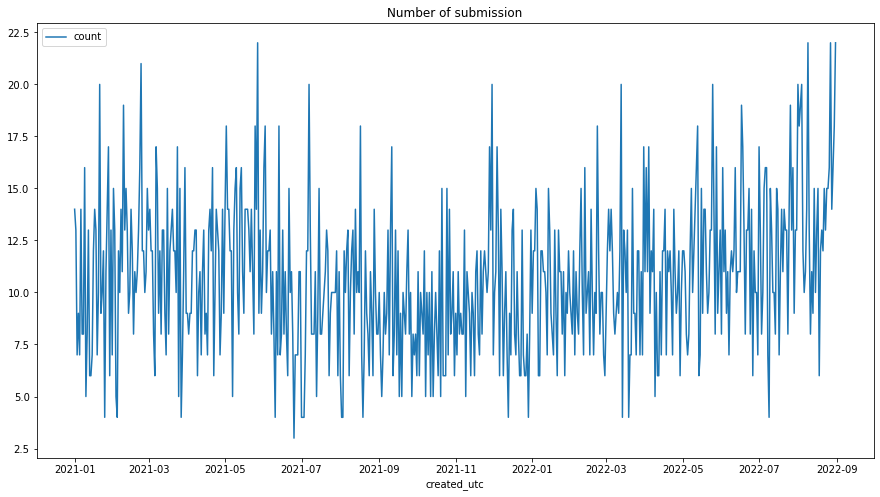

In [0]:
time_submission = submission_small.withColumn("created_utc", from_unixtime(col("created_utc"),"MM-dd-yyyy"))
time_submission = time_submission.withColumn("created_utc",to_date(col("created_utc"),"MM-dd-yyyy"))
time_count = time_submission.groupBy('created_utc').count().orderBy(col('created_utc')).toPandas()
time_count.plot.line(x="created_utc", y="count", figsize=(15,8), title='Number of submission')
plot_fpath = os.path.join(PLOT_DIR, 'time_series_number_submission.png')
plt.savefig(plot_fpath)
plt.show()


## 3.4 Wordcloud of hottest adult subreddits

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

submission_small_wc = submission_small.filter(submission_small.over_18 == True)
submission_small_wc_by_subreddit = submission_small_wc.groupBy("subreddit").count().orderBy(col("count"), ascending=False)
submission_small_wc_by_subreddit.show()

+------------------+-----+
|         subreddit|count|
+------------------+-----+
|      dirtykikpals|   35|
|       GaySnapchat|   30|
|          dirtyr4r|   25|
|         jerkbudss|   23|
|       FreeKarma4U|   21|
|  onlyfansgirls101|   21|
|     NSFW_Tributes|   15|
|              cock|   14|
|       OnlyFans101|   14|
|      dirtypenpals|   13|
|           Sissies|   13|
|OnlyFansPromotions|   13|
|     DirtySnapchat|   13|
|              Slut|   13|
|       WickrFinder|   12|
|             pussy|   11|
|   onlyfanshottest|   11|
|   GaybrosGoneWild|   10|
|    SluttyOnlyfans|   10|
|     naughtychicks|   10|
+------------------+-----+
only showing top 20 rows



/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field crosspost_parent_list. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: ArrayType(StructType([StructField('approved_at_utc', StringType(), True), StructField('approved_by', StringType(), True), StructField('archived', BooleanType(), True), StructField('author', StringType(), True), StructField('author_flair_css_class', StringType(), True), StructField('author_flair_text', StringType(), True), StructField('banned_at_utc', StringType(), True), StructField('banned_by', StringType(), True), StructField('brand_safe', BooleanType(), True), StructField('can_gild', BooleanType(), True), StructField('can_mod_post', BooleanType(),

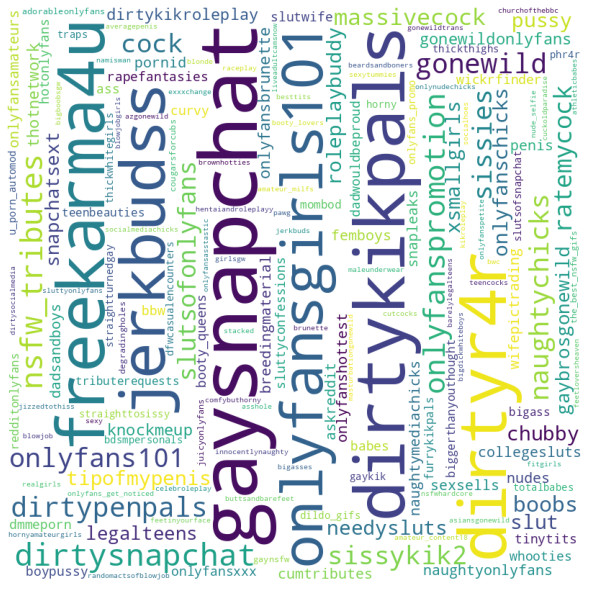

In [0]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
tem = submission_small_wc.toPandas()
for val in tem.subreddit:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plot_fpath = os.path.join(PLOT_DIR, f'top_10_over_18_subreddits.png')

plt.savefig(plot_fpath)

plt.show()

##3.5 A Pie Chart to Display the Video Post proportion

In [0]:
submission_small.groupBy('is_video').count().show()

+--------+-----+
|is_video|count|
+--------+-----+
|   false| 6338|
|    true|  167|
+--------+-----+



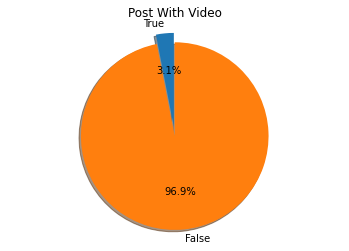

In [0]:
import matplotlib.pyplot as plt

labels = 'True', 'False'
sizes = [195, 6187]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Post With Video')
plot_fpath = os.path.join(PLOT_DIR, 'percentage_media.png')

plt.savefig(plot_fpath)
plt.show()

#4. Summary tables

##4.1 Summary Table of number of comments

In [0]:
from pyspark.sql import functions
submission_num_comments = submissions.groupBy('subreddit').agg(functions.min('num_comments').alias('min_num_comments'),
                                          functions.max('num_comments').alias('max_num_comments'), 
                                          functions.mean('num_comments').alias('mean_num_comments'),
                                          functions.sum('num_comments').alias('total_num_of_comments')).collect()

first_10_submission_num_comments = spark.createDataFrame(submission_num_comments[:10]).toPandas()
fpath = os.path.join(CSV_DIR, "first_10_submission_num_comments.csv")
#submission_num_comments.toPandas().to_csv(fpath)
first_10_submission_num_comments.to_csv(fpath)

In [0]:
first_10_submission_num_comments

,subreddit,min_num_comments,max_num_comments,mean_num_comments,total_num_of_comments
0,mummytummies,0,156,4.409244,95297
1,ColoradoSex,0,86,1.485588,25255
2,utah_nsfw_personal,0,66,1.778106,17461
3,jewelry,0,315,2.963881,84930
4,mccisland,0,140,7.740988,5798
5,u_oeokacom,0,0,0.000000,0
6,GayZoom,0,81,1.092382,117147
7,NUjijDiscussies,0,11,1.008739,24703
8,UnderratedInstaGirls,0,66,2.043471,11705
9,travel,0,4143,5.421902,705243


##4.2 Summary table of number of comments for each subreddit and the comment score distribution

In [0]:
comment_score = comment_small.groupBy('subreddit').agg(count(col('subreddit')).alias('count'),
                                       functions.mean('score').alias('avg_score'),
                                       functions.max('score').alias('max_score'),
                                       functions.min('score').alias('min_score')).collect()
comment_score_df = spark.createDataFrame(comment_score).toPandas()
fpath = os.path.join(CSV_DIR, "comment_score.csv")
comment_score_df.to_csv(fpath)

In [0]:
comment_score_df.head()

,subreddit,count,avg_score,max_score,min_score
0,Youniqueamua,1,16.000000,16,16
1,flashlight,1,0.000000,0,0
2,Bossfight,1,1.000000,1,1
3,ShitMomGroupsSay,1,4.000000,4,4
4,FortNiteBR,7,1.857143,15,-16


##4.3 Summary table of the new number of subreddits, comments and average score for the time series

In [0]:
time_comments = comment_small.withColumn("created_utc", from_unixtime(col("created_utc"),"MM-dd-yyyy"))
time_comments = time_comments.withColumn("created_utc",to_date(col("created_utc"),"MM-dd-yyyy"))
time_comments_summary = time_comments.groupBy('created_utc').agg(countDistinct('subreddit').alias('num_subreddits'),
                                         count('body').alias('num_comment'),
                                         mean('score').alias('avg_score')
                                          ).orderBy(col('created_utc')).collect()
time_comments_summary_df = spark.createDataFrame(time_comments_summary).toPandas()
fpath = os.path.join(CSV_DIR, "time_comments_summary.csv")


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<command-1345013899334194> in <cell line: 9>()
      7 time_comments_summary_df = spark.createDataFrame(time_comments_summary).toPandas()
      8 fpath = os.path.join(CSV_DIR, "time_comments_summary.csv")
----> 9 time_comments_summary_df.toPandas().to_csv(fpath)

/databricks/python/lib/python3.9/site-packages/pandas/core/generic.py in __getattr__(self, name)
   5485         ):
   5486             return self[name]
-> 5487         return object.__getattribute__(self, name)
   5488 
   5489     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'toPandas'

In [0]:
time_comments_summary_df.to_csv(fpath)

In [0]:
time_comments_summary_df.head()

,created_utc,num_subreddits,num_comment,avg_score
0,2021-01-01,1,1,2.000000
1,2021-01-02,1,1,2.000000
2,2021-01-03,7,7,2.285714
3,2021-01-04,1,1,115.000000
4,2021-01-05,2,2,1.000000


# 5. New variables

##5.1 Create a new variable to show the created_utc into date

In [0]:
comments_small = comment_small.withColumn("created_utc", from_unixtime(col("created_utc"),"MM-dd-yyyy"))
comments_small = time_comments.withColumn("created_utc",to_date(col("created_utc"),"MM-dd-yyyy"))

##5.2 Create a dummy variable to show a comment is a good or bad comments(Score higher than avg)

In [0]:
from pyspark.sql.functions import lit
from pyspark.sql.functions import mean
from pyspark.sql.functions import when

avg_score = comment_small.select(mean('score')).collect()[0][0]
print(avg_score)

comment_small = comment_small.withColumn("good_comments", \
   when((comment_small.score > avg_score), lit(1)) \
     .otherwise(lit(0)) \
  )

## 5.3 Create a dummy variable to show the contradiction of a post.

In [0]:
submission_small = submission_small.withColumn('total_score',sum(submission_small[col] for col in ["score","num_comments","num_crossposts"]))

#6. Create a dummy variable to show a Gay related comment and Summary

In [0]:
comment_small = comment_small.withColumn("Gay_comments", \
   when((comment_small.body.rlike("gay")), lit(1)) \
     .otherwise(lit(0)) \
  )

In [0]:
from pyspark.sql import functions
comment_small.groupBy('subreddit').agg(functions.sum('Gay_comments').alias('total_num_of_comments')).show()

+-------------------+---------------------+
|          subreddit|total_num_of_comments|
+-------------------+---------------------+
|FORTNITESKINBATTLES|                    0|
|             soccer|                    0|
|    whereintheworld|                    0|
|    DanLeBatardShow|                    0|
|          Parenting|                    0|
|       shittygaming|                    0|
|   RepublicadeChile|                    0|
|           slutwife|                    0|
|          AskReddit|                    0|
|            boulder|                    0|
|     astrologymemes|                    0|
|     MegaFiles4Free|                    0|
|               vita|                    0|
|    NFCNorthMemeWar|                    0|
|       cataclysmdda|                    0|
|              J4ila|                    0|
|        cocksincars|                    0|
|  dontyouknowwhoiam|                    0|
|   MovieSuggestions|                    0|
|         ukpolitics|           

# 7 Read NASDAQ Composite data and compare the change of price

In [0]:
Nasdaq = pd.read_csv("/dbfs/FileStore/finance.csv")
Nasdaq['Date']= pd.to_datetime(Nasdaq['Date']).dt.date

In [0]:
new_df = pd.merge(Nasdaq, time_count, how='left', left_on='Date', right_on='created_utc')
new_df = new_df.drop('created_utc', axis=1)
new_df.iloc[:,1:8] = new_df.iloc[:,1:8].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
new_df.head(20)


,Date,Open,High,Low,Close,Adj Close,Volume,count
0,2021-01-04,-0.645849,-0.744259,-0.865455,-0.850890,-0.850890,1.329069,-0.471921
1,2021-01-05,-0.877991,-0.849596,-0.769488,-0.755131,-0.755131,1.650360,-1.022167
2,2021-01-06,-0.877595,-0.783899,-0.781765,-0.817246,-0.817246,2.318595,0.903693
3,2021-01-07,-0.718123,-0.637517,-0.611366,-0.557653,-0.557653,1.535912,-0.747044
4,2021-01-08,-0.485972,-0.542896,-0.478708,-0.450777,-0.450777,1.937121,-0.747044
5,2021-01-11,-0.574305,-0.599275,-0.507747,-0.582326,-0.582326,1.625209,-0.747044
6,2021-01-12,-0.563779,-0.626107,-0.535649,-0.553720,-0.553720,1.899143,0.628570
7,2021-01-13,-0.543209,-0.572724,-0.467333,-0.508808,-0.508808,1.801717,-1.297290
8,2021-01-14,-0.474455,-0.533149,-0.430211,-0.521769,-0.521769,1.440768,-1.297290
9,2021-01-15,-0.533784,-0.598015,-0.546750,-0.612466,-0.612466,1.199926,-1.022167


Compare the changes of Nasdaq open number and the Reddit new submissions.

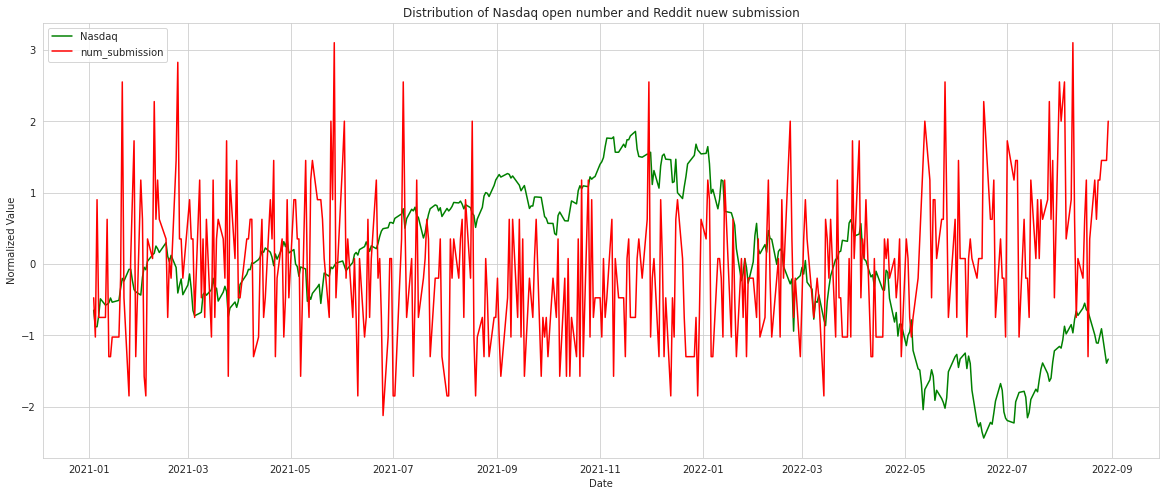

In [0]:
import seaborn as sns
time = new_df['Date'].to_list()
open = new_df['Open'].to_list()
count = new_df['count'].to_list()

# set the seaborn style
sns.set_style("whitegrid")
 
# Color palette
blue, = sns.color_palette("muted", 1)
# Initialize figure and axis
fig, ax = plt.subplots(figsize=(20, 8))
# Plot lines
ax.plot(time, open, color="green", label = 'Nasdaq')
ax.plot(time, count, color="red", label = 'num_submission')
ax.legend(loc = 'upper left')
ax.set_title('Distribution of Nasdaq open number and Reddit nuew submission')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Value')
plot_fpath = os.path.join(PLOT_DIR, 'Distribution.png')

fig.savefig(plot_fpath)

fig.show()